In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier


# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix


from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report 


import warnings
warnings.simplefilter(action='ignore')


In [284]:
df = pd.read_csv("./data/train.csv")

In [285]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


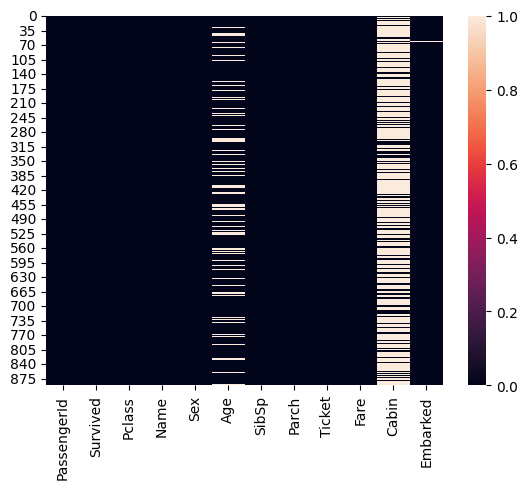

In [286]:
sns.heatmap(df.isna());

In [287]:
df.drop(columns=['Cabin','Ticket','PassengerId'], inplace=True)

In [288]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [289]:
#EDA

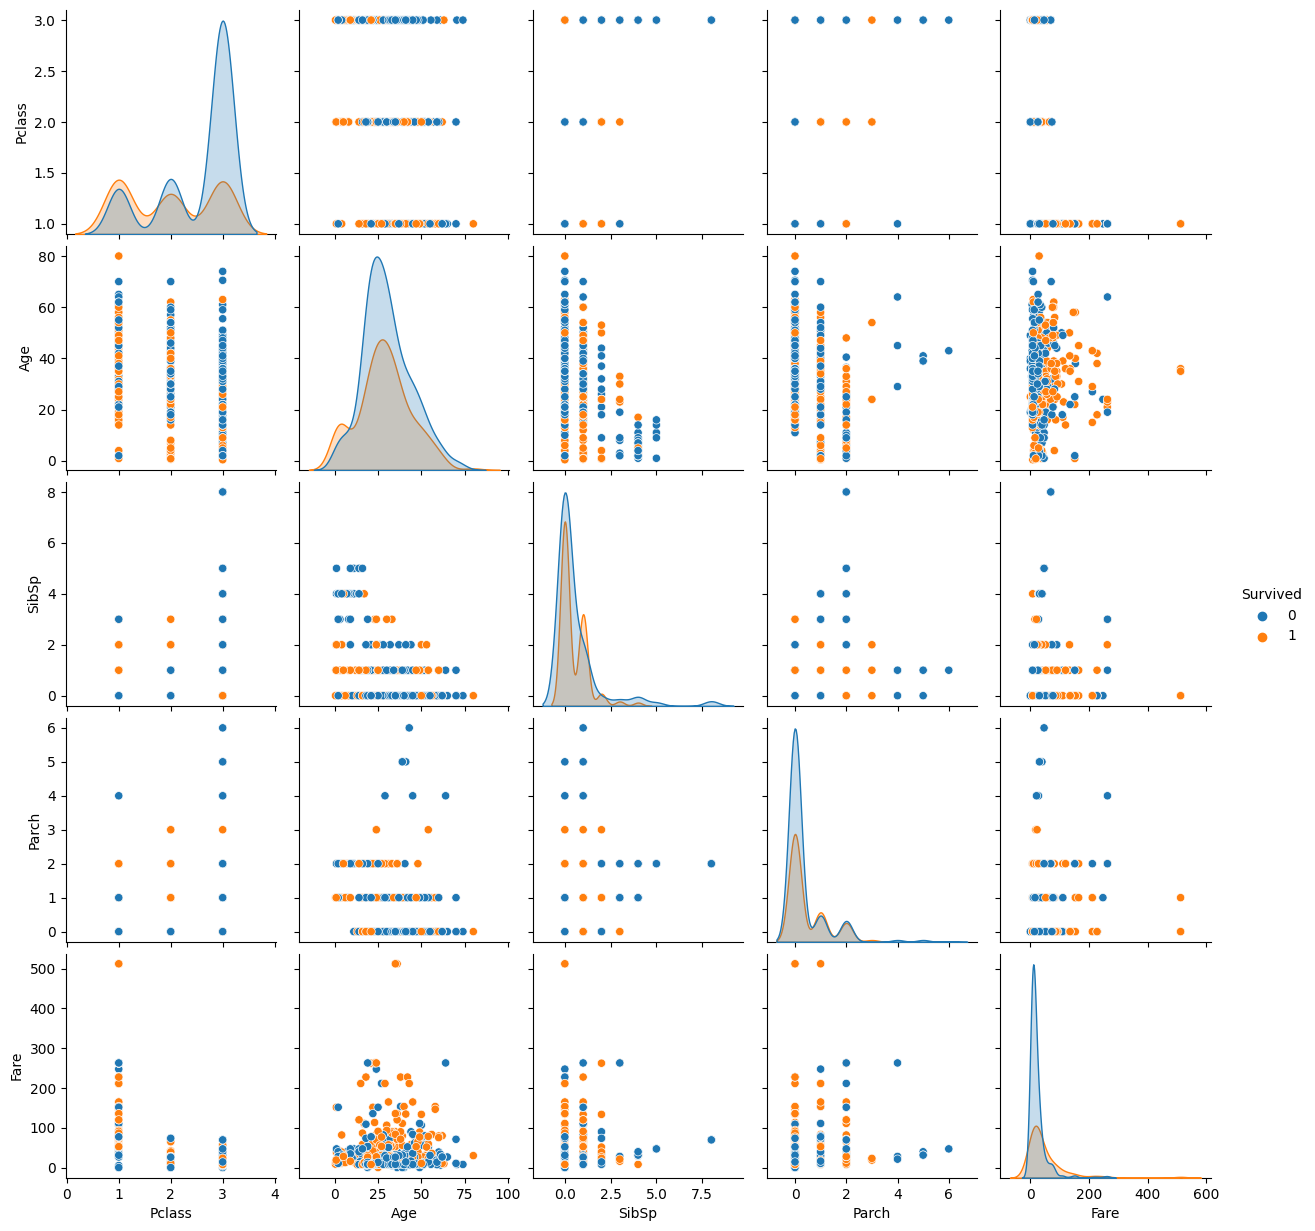

In [290]:
sns.pairplot(df_train, hue="Survived")

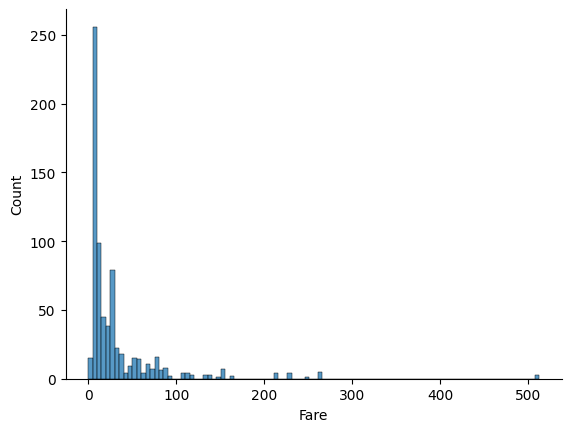

In [291]:
sns.histplot(data=df_train, x="Fare");
sns.despine()

In [292]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S
733,0,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S
382,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S
704,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S


In [293]:
df_new = df_train[["Survived", "Age", "SibSp", "Fare"]]

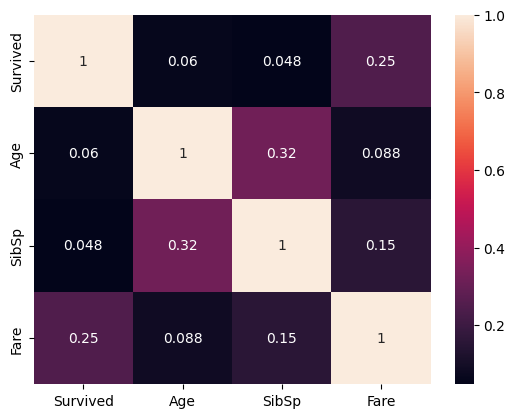

In [294]:
sns.heatmap(df_new.corr().abs(), annot=True);

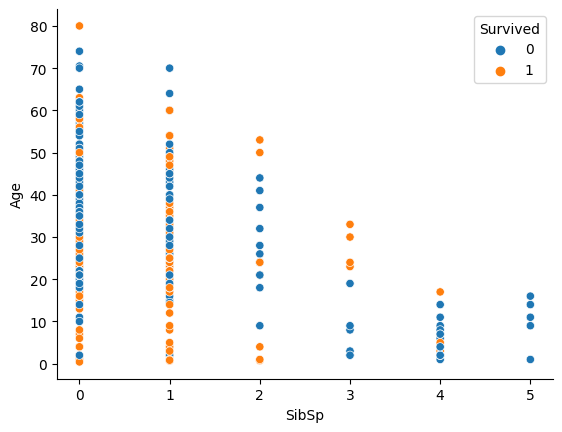

In [295]:
sns.scatterplot(data=df_train, x="SibSp", y="Age", hue="Survived");
sns.despine()

In [296]:
df_train.groupby("Embarked")[["Survived"]].mean().sort_values(by="Survived", ascending=False)


,Survived
Embarked,
C,0.544000
Q,0.366667
S,0.335238


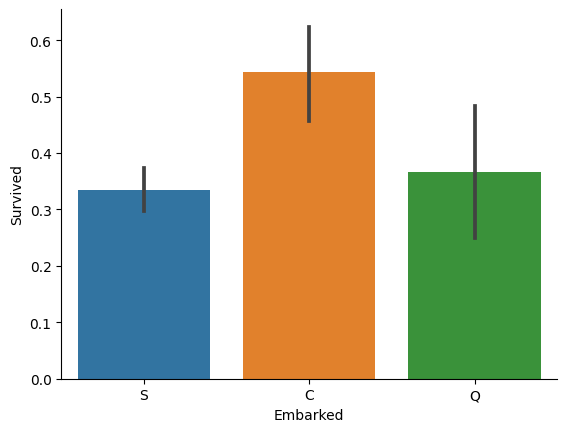

In [297]:
sns.barplot(x='Embarked',y='Survived', data=df_train);
sns.despine()

In [298]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

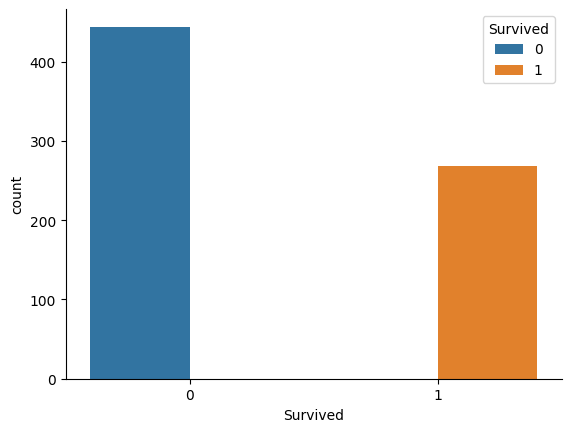

In [299]:
sns.countplot(data=df_train, x="Survived", hue='Survived');
sns.despine()

In [300]:
#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

surv_pass=df[(df["Survived"] == 1) & (df["Pclass"] == 1)]

In [301]:
class_pa=df[df["Pclass"]==1]

In [302]:
prop=len(surv_pass)/len(class_pa)
prop

0.6296296296296297

In [303]:
#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

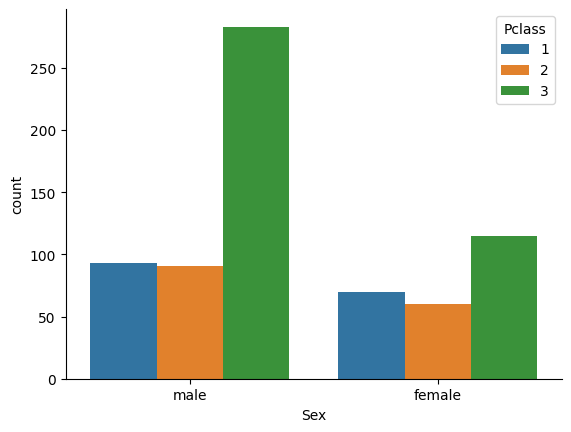

In [304]:
sns.countplot(data=df_train, x="Sex", hue='Pclass');
sns.despine()

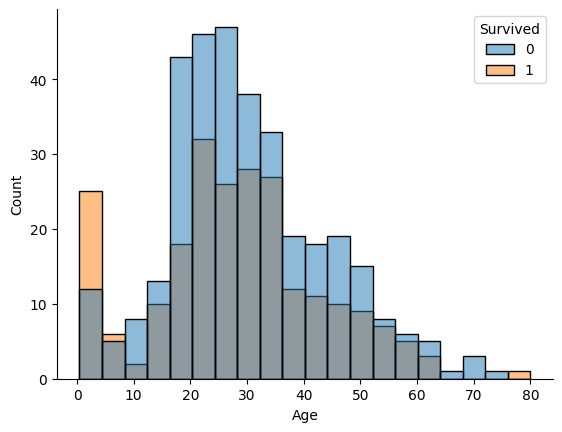

In [305]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.histplot(data=df_train, x="Age", hue="Survived");
sns.despine()

In [306]:
#Calculate the average age for survived and drowned passengers separately.
df.groupby("Survived")[["Age"]].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [307]:

df_train["Age"].mean()

29.498846153846156

In [308]:
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [309]:
df_train.groupby(["Survived", "Pclass", "Sex"]).size().unstack()

Sex              female  male
Survived Pclass              
0        1            3    61
         2            2    76
         3           59   243
1        1           67    32
         2           58    15
         3           56    40

In [310]:
### Preprocessing and pipeline

In [311]:
# 1.Split the data

In [312]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [313]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S
733,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S
382,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S
704,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S
813,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...,...
106,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,7.6500,S
270,1,"Cairns, Mr. Alexander",male,NaN,0,0,31.0000,S
860,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,S
435,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,120.0000,S


In [314]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [315]:
X.shape

(712, 8)

In [316]:
y.shape

(712,)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [318]:
#Create pipelines

In [319]:
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))

In [320]:
num_pipe = make_pipeline(SimpleImputer(strategy='median'),
                         MinMaxScaler()
)

In [321]:
### Create custom function

def name_length(df):
    length = df[df.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [354]:
feature_transform = ColumnTransformer(
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("cat", cat_pipe, ['Pclass', 'Embarked', 'Parch', 'Sex']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'


#name, transformation, columns

In [323]:
feature_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x284febeb0>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [356]:
feature_transform.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x284febeb0>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [351]:
# Check contents of transformers_
print(feature_transform.transformers_)

[('num', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())]), ['Age', 'Fare']), ('cat', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))]), ['Pclass', 'Embarked', 'Parch', 'Sex']), ('name', FunctionTransformer(func=<function name_length at 0x284febeb0>), ['Name']), ('do_nothing', 'passthrough', ['SibSp'])]


In [353]:
# Extract feature names
feature_names = []

for name, trans, columns in feature_transform.transformers_:
    if name == 'cat':
        # If categorical columns, get feature names after encoding
        feature_names.extend(trans.get_feature_names_out(input_features=columns))
    else:
        # If numeric columns, simply append the column names
        feature_names.extend(columns)

print(feature_names)

['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Sex_female', 'Sex_male', 'Name', 'SibSp']


In [325]:
Xtrain_fe = feature_transform.transform(X_train) 
Xtest_fe =feature_transform.transform(X_test)    

#### Logistic Regression

In [326]:
m_log = LogisticRegression(max_iter=400)

In [327]:
m_log.fit(Xtrain_fe, y_train)

LogisticRegression(max_iter=400)

In [328]:
m_log.score(Xtrain_fe, y_train)

0.8066783831282952

In [367]:
m_log.coef_

array([[-1.02282734,  0.12205273,  0.66274565,  0.28434983, -0.92691659,
         0.35820938,  0.0464287 , -0.38445918,  0.17247424,  0.59227652,
         0.28080144,  0.52236106, -0.79099893, -0.75673545,  1.36150311,
        -1.34132421,  0.0125991 , -0.32378118]])

In [368]:
 m_log.intercept_

array([0.23511147])

In [329]:
# get predictions
y_pred = m_log.predict(Xtest_fe)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [330]:
# Evaluating Logistic Regression

In [331]:
print(classification_report(y_test, y_pred,  labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        95
           1       0.67      0.58      0.62        48

    accuracy                           0.76       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.76      0.76      0.76       143



In [332]:

#Checking the scores 

metrics.accuracy_score(y_test, y_pred)

0.7622377622377622

In [333]:
metrics.precision_score(y_test, y_pred, pos_label=1)

0.6666666666666666

In [334]:
metrics.recall_score(y_test, y_pred, pos_label=0)

0.8526315789473684

In [335]:
 metrics.f1_score(y_test, y_pred, pos_label=1)

0.6222222222222222

In [336]:
conf_matrix=metrics.confusion_matrix(y_test, y_pred, labels=m_log.classes_)
conf_matrix

array([[81, 14],
       [20, 28]])

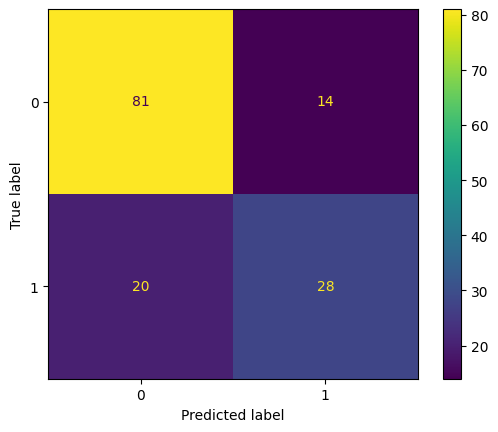

In [337]:
ConfusionMatrixDisplay(conf_matrix,  display_labels=m_log.classes_).plot();

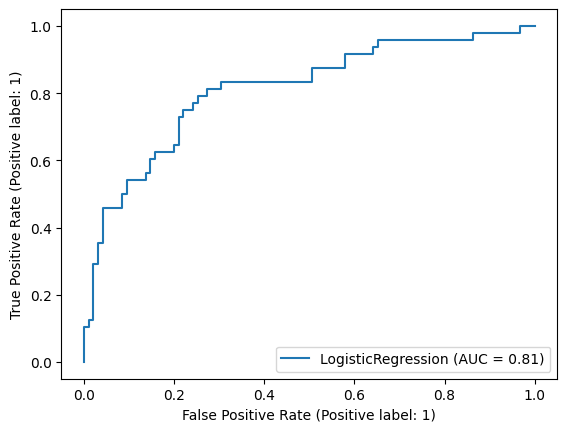

In [338]:

RocCurveDisplay.from_estimator(m_log, Xtest_fe, y_test);

In [339]:
# Decision Trees

In [340]:
m_tree =DecisionTreeClassifier()

In [341]:
m_tree.fit(Xtrain_fe, y_train)

DecisionTreeClassifier()

In [342]:
m_tree.score(Xtrain_fe, y_train)

0.9947275922671354

In [343]:
# get predictions
y_pred_tree = m_log.predict(Xtest_fe)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

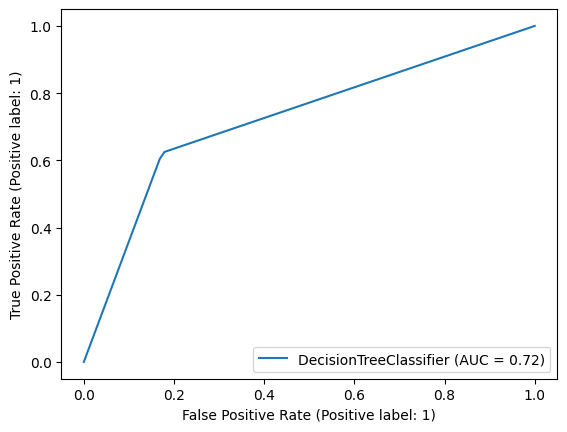

In [373]:
RocCurveDisplay.from_estimator(m_tree, Xtest_fe, y_test);

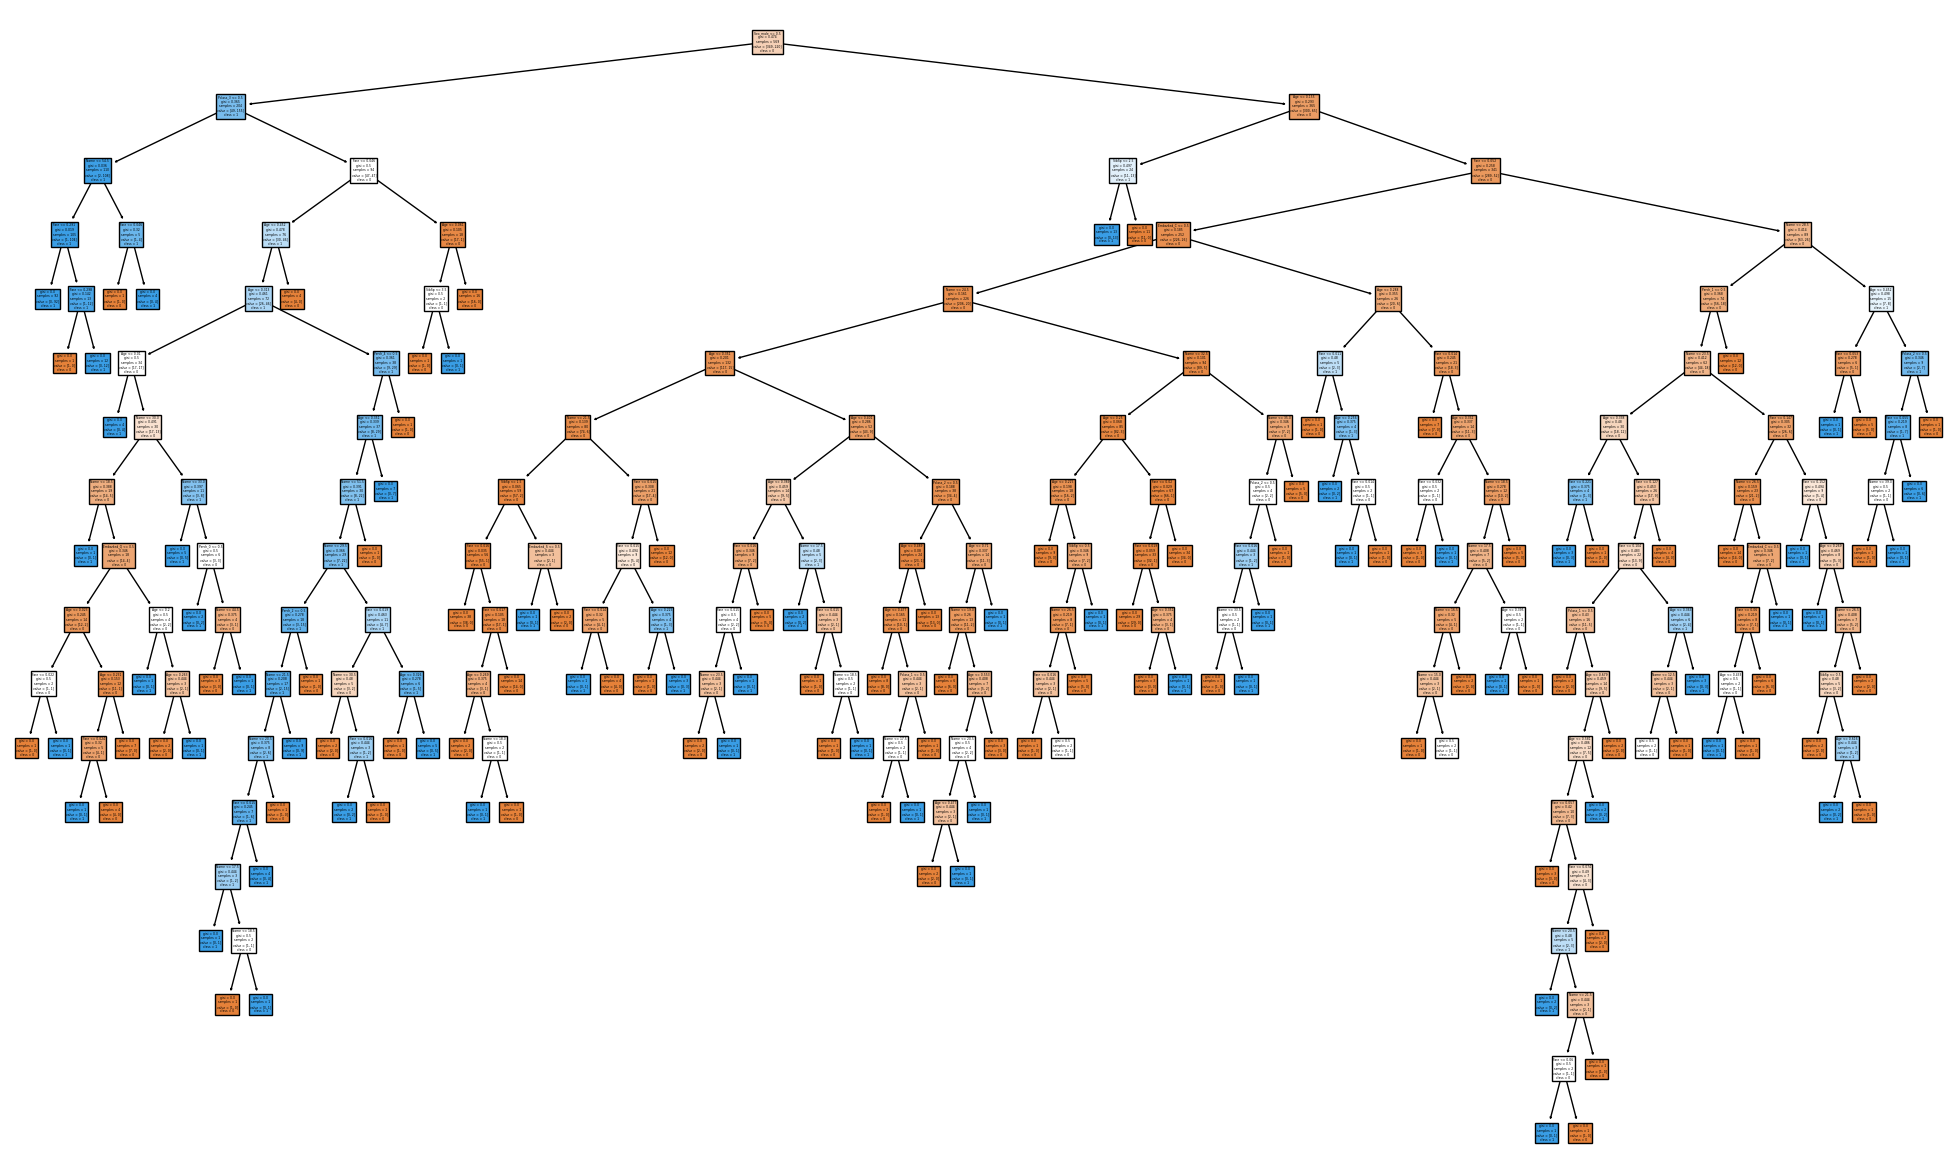

In [350]:
plt.figure(figsize = (25,15))
t = plot_tree(m_tree, feature_names = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Sex_female', 'Sex_male', 'Name', 'SibSp'], class_names=["0", "1"], filled=True)

In [ ]:
# Random Forest

In [359]:
m_for=RandomForestClassifier(max_depth=6)

In [360]:
m_for.fit(Xtrain_fe, y_train)

RandomForestClassifier(max_depth=6)

In [369]:
m_for.score(Xtrain_fe, y_train)

0.8910369068541301

In [370]:
# get predictions
y_pred_tree = m_log.predict(Xtest_fe)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

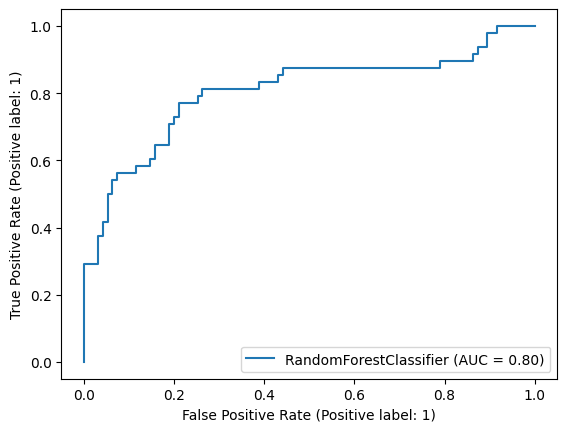

In [372]:
RocCurveDisplay.from_estimator(m_for, Xtest_fe, y_test);

In [376]:
## Model Evaluations

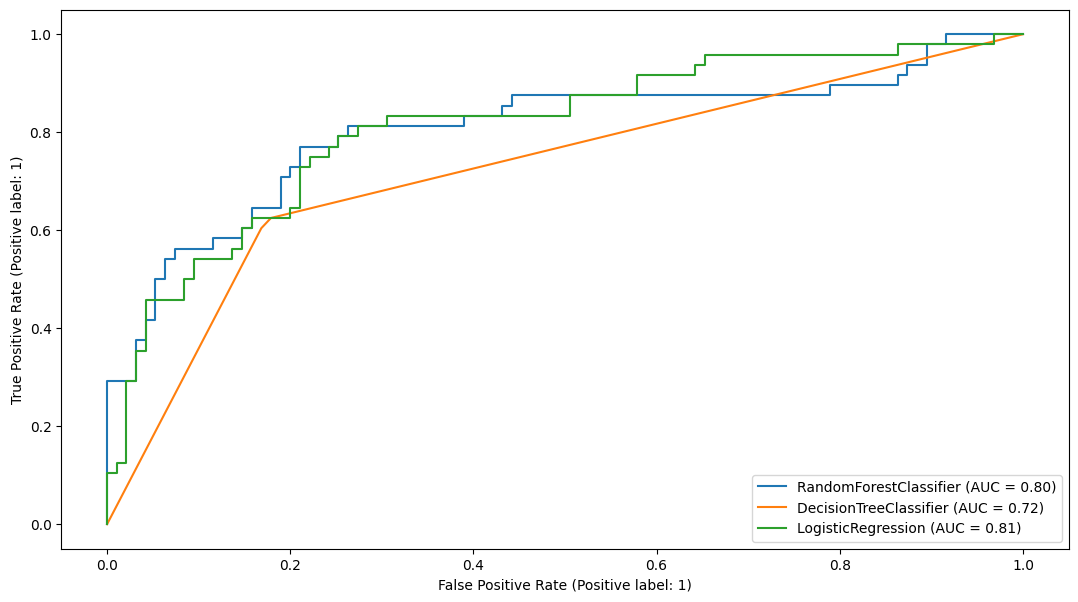

In [375]:
fig, axes = plt.subplots(1,1, figsize=(13,7))

RocCurveDisplay.from_estimator(m_for, Xtest_fe, y_test, ax=axes);
RocCurveDisplay.from_estimator(m_tree, Xtest_fe, y_test,ax=axes);
RocCurveDisplay.from_estimator(m_log, Xtest_fe, y_test,ax=axes);